# shLars polysome profiling

In [364]:
%%bash
ls *_R[1-2]_001*

16207X1_190807_A00421_0097_AHCHHWDRXX_S8_L001_R1_001.fastq.gz
16207X1_190807_A00421_0097_AHCHHWDRXX_S8_L001_R2_001.fastq.gz
16207X2_190807_A00421_0097_AHCHHWDRXX_S7_L001_R1_001.fastq.gz
16207X2_190807_A00421_0097_AHCHHWDRXX_S7_L001_R2_001.fastq.gz
16207X3_190807_A00421_0097_AHCHHWDRXX_S6_L001_R1_001.fastq.gz
16207X3_190807_A00421_0097_AHCHHWDRXX_S6_L001_R2_001.fastq.gz
16207X4_190807_A00421_0097_AHCHHWDRXX_S5_L001_R1_001.fastq.gz
16207X4_190807_A00421_0097_AHCHHWDRXX_S5_L001_R2_001.fastq.gz
16207X5_190807_A00421_0097_AHCHHWDRXX_S4_L001_R1_001.fastq.gz
16207X5_190807_A00421_0097_AHCHHWDRXX_S4_L001_R2_001.fastq.gz
16207X6_190807_A00421_0097_AHCHHWDRXX_S3_L001_R1_001.fastq.gz
16207X6_190807_A00421_0097_AHCHHWDRXX_S3_L001_R2_001.fastq.gz
16207X7_190807_A00421_0097_AHCHHWDRXX_S2_L001_R1_001.fastq.gz
16207X7_190807_A00421_0097_AHCHHWDRXX_S2_L001_R2_001.fastq.gz
16207X8_190807_A00421_0097_AHCHHWDRXX_S1_L001_R1_001.fastq.gz
16207X8_190807_A00421_0097_AHCHHWDRXX_S1_L001_R2_001.fastq.gz


### Trimming task

In [ ]:
%%bash
# Trimming task
for f1 in 16207X[1-8]_190807_A00421_0097_AHCHHWDRXX_S[1-8]_L001_R1_001.fastq.gz; do
    f2=${f1/R1_001.fastq.gz/R2_001.fastq.gz};     
    out1=${f1/R1_001.fastq.gz/out1.trim.fastq.gz};     
    out2=${f2/R2_001.fastq.gz/out2.trim.fastq.gz};     
    echo cutadapt -j 12 -q 15 -m 20 -a AGATCGGAAGAGCACACGTCTGAACTCCAGTCA -A AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTG -o $out1 -p $out2 $f1 $f2;
         cutadapt -j 12 -q 15 -m 20 -a AGATCGGAAGAGCACACGTCTGAACTCCAGTCA -A AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTG -o $out1 -p $out2 $f1 $f2 >> log.txt; 
done

In [365]:
%%bash
ls *trim*

16207X1_AHCHHWDRXX_S8_R1.trim.fastq.gz
16207X1_AHCHHWDRXX_S8_R2.trim.fastq.gz
16207X2_AHCHHWDRXX_S7_R1.trim.fastq.gz
16207X2_AHCHHWDRXX_S7_R2.trim.fastq.gz
16207X3_AHCHHWDRXX_S6_R1.trim.fastq.gz
16207X3_AHCHHWDRXX_S6_R2.trim.fastq.gz
16207X4_AHCHHWDRXX_S5_R1.trim.fastq.gz
16207X4_AHCHHWDRXX_S5_R2.trim.fastq.gz
16207X5_AHCHHWDRXX_S4_R1.trim.fastq.gz
16207X5_AHCHHWDRXX_S4_R2.trim.fastq.gz
16207X6_AHCHHWDRXX_S3_R1.trim.fastq.gz
16207X6_AHCHHWDRXX_S3_R2.trim.fastq.gz
16207X7_AHCHHWDRXX_S2_R1.trim.fastq.gz
16207X7_AHCHHWDRXX_S2_R2.trim.fastq.gz
16207X8_AHCHHWDRXX_S1_R1.trim.fastq.gz
16207X8_AHCHHWDRXX_S1_R2.trim.fastq.gz


### Alignment task

In [ ]:
%%bash
for f1 in *_R1.trim.fastq.gz; do
    f2=${f1/_R1.trim.fastq.gz/_R2.trim.fastq.gz};     
	out=${f1/_R1.trim.fastq.gz/_}   
    STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand zcat --runThreadN 8 --sjdbGTFfile /rumi/shams/genomes/mm10/mm10_ensemble_genes.gtf --genomeDir /rumi/shams/genomes/mm10 --readFilesIn $f1 $f2 --outFileNamePrefix $out
done&

In [369]:
%%bash
ls *out.bam


16207X1_AHCHHWDRXX_S8_Aligned.sortedByCoord.out.bam
16207X2_AHCHHWDRXX_S7_Aligned.sortedByCoord.out.bam
16207X3_AHCHHWDRXX_S6_Aligned.sortedByCoord.out.bam
16207X4_AHCHHWDRXX_S5_Aligned.sortedByCoord.out.bam
16207X5_AHCHHWDRXX_S4_Aligned.sortedByCoord.out.bam
16207X6_AHCHHWDRXX_S3_Aligned.sortedByCoord.out.bam
16207X7_AHCHHWDRXX_S2_Aligned.sortedByCoord.out.bam
16207X8_AHCHHWDRXX_S1_Aligned.sortedByCoord.out.bam


### Measure counts

In [ ]:
%%bash
for f in *_Aligned.sortedByCoord.out.bam; do
    out=${f/.bam/.gene.fc}
    featureCounts -T 12 -P -B -C -O -t exon -g gene_id -a /rumi/shams/genomes/mm10/mm10_ensemble_genes.gtf -o $out $f;
done

In [377]:
%%bash
ls *.gene.fc | grep -v denovo 

16207X1.gene.fc
16207X2.gene.fc
16207X3.gene.fc
16207X4.gene.fc
16207X5.gene.fc
16207X6.gene.fc
16207X7.gene.fc
16207X8.gene.fc


# Load R

In [378]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [299]:
%%R
library(DESeq2, quietly = TRUE)
library(tidyverse, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(ggrepel, quietly = TRUE)
library(EnhancedVolcano, quietly = TRUE)
library(ggpubr, quietly = TRUE)

## Read data 

In [362]:
%%R
files <- list.files(pattern=".fc$") 
files <- files[-grep("denovo", files)]  

cell.line   <- c(rep("KO",2),rep("WT",6))
replicate <- c(rep("",2), rep('1',2), rep('2',2), rep('3',2))
sample.type <- c(rep(c("Input","Arc_IP"),4))
cond <- paste(cell.line, sample.type, sep="_")
all_cond <- paste(cell.line, replicate, sample.type, sep="_")

datalist <- lapply(files, function(x){read.table(file=x,header=TRUE,colClasses=c(NA, "NULL", "NULL", "NULL", "NULL", "NULL", NA),check.names=F)})
m <- Reduce(function(...) merge(..., by=1, all = TRUE), datalist)
rownames(m) <- m[,1]
m <- m[,-1]
m[is.na(m)]<-0
m <- round(m)
colnames(m) <- f_name
f_name <- unlist(lapply(colnames(m), function(i) unlist(strsplit(i, "_"))[1]))
colData <- data.frame(cond, row.names=f_name)

# DE Analysis

In [382]:
%%R
dds <- DESeqDataSetFromMatrix(countData = m, colData = colData, design = ~ cond)
dds$cond <- relevel(dds$cond, ref="WT_Input")
dds <- DESeq(dds)
resultsNames(dds)
ncu <- counts(dds, normalized=TRUE)
write.table(ncu, file="gene_count_table_DE2norm.txt", sep="\t", quote=FALSE, col.names=all_cond) 
write.table(m, file="gene_count_table_raw.txt", sep="\t", quote=FALSE, col.names=all_cond )
cds <- estimateDispersions(dds)
vsd <- varianceStabilizingTransformation(cds)

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates



### PCA 

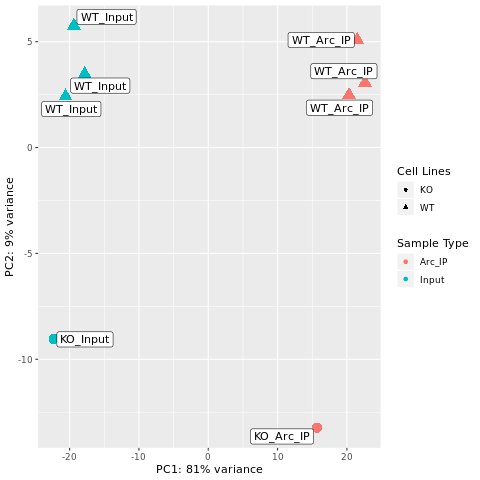

In [379]:
%%R
z <- plotPCA(vsd,intgroup=c("cond"), returnData=TRUE)
percentVar <- round(100 * attr(z, "percentVar"))
p <- ggplot(z, aes(PC1, PC2)) +
  geom_point(aes(size = 4, color = sample.type, shape = cell.line)) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) +
  geom_label_repel(label = cond, force = 10) +
  labs(shape="Cell Lines", colour="Sample Type") +
  guides(size = FALSE)
print (p)

### Model $$(WT ArcIP - WT Input) - (KO ArcIP - KO Input)$$

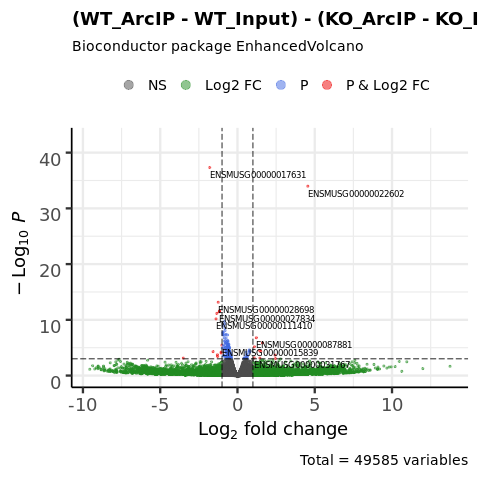

In [383]:
%%R
res <- results(dds, contrast=list(c('cond_WT_Arc_IP_vs_WT_Input', 'cond_KO_Input_vs_WT_Input'),
                                   c('cond_KO_Arc_IP_vs_WT_Input')), listValues=c(1,-1))
write.table(res, "WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t", quote=FALSE, col.names=NA )
# Volcano plot 
vol <- EnhancedVolcano(res,
    lab = rownames(res),
    x = 'log2FoldChange',
    y = 'pvalue',
#     xlim = c(-6, 6),
    title = '(WT_ArcIP - WT_Input) - (KO_ArcIP - KO_Input)',
    pCutoff = 1e-3,
    FCcutoff = 1)
print (vol)

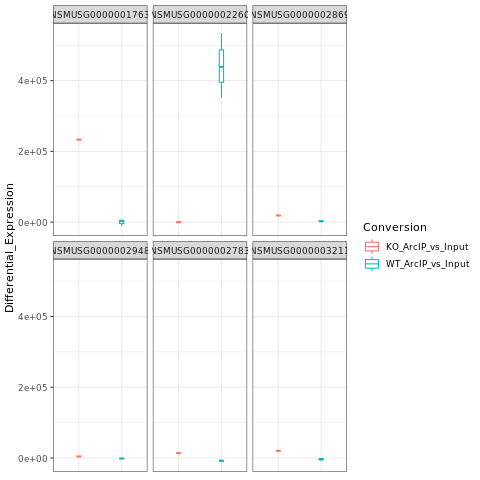

In [384]:
%%R
# check top genes 
top_genes <- rownames(head(res[order(res$pvalue),]))
myplots <- list() 
check <- data.frame()
for (g in 1:length(top_genes)){
    check <- rbind(check,data.frame(
                        'Differential_Expression' = c(
                            ncu[top_genes[g],rownames(subset (colData,cond == 'WT_Arc_IP'))] -
                            ncu[top_genes[g],rownames(subset (colData,cond == 'WT_Input'))],
                            ncu[top_genes[g],rownames(subset (colData,cond == 'KO_Arc_IP'))] -
                            ncu[top_genes[g],rownames(subset (colData,cond == 'KO_Input'))]),
                        'Conversion' = c(rep('WT_ArcIP_vs_Input',3),rep('KO_ArcIP_vs_Input',1)),
                        'Gene' = top_genes[g]))
    rownames(check) <- c()

}
ggplot(data = check, mapping = aes(x = Conversion, y = Differential_Expression, color = Conversion)) +
    geom_boxplot(width=0.1)+
    scale_fill_grey() +
    theme_bw() +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
    facet_wrap(facets = vars(Gene))

In [385]:
%%R
res <- data.frame(res, row.names = rownames(res))
positive_res <- res %>% 
                rownames_to_column('gene') %>%
                filter(log2FoldChange > 0 & pvalue < 1e-3)
positive_ncu <- ncu[positive_res$gene,]

write.table(positive_res, file="positive_WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t", quote=FALSE, col.names=NA )
write.table(positive_ncu, file="positive_gene_count_table_DE2norm.txt", sep="\t", quote=FALSE, col.names=all_cond) 

# _de-novo_ transcript annotation

In [ ]:
%%bash 
# merge all .bam files 
samtools merge -@ 12 all.merged.bam *.bam
# sort the merged file 
samtools sort -@12 all.merged.bam > all.merged.sort.bam
# using scallop to make de-novo transcipt annotation (.gtf file)
scallop -i all.merged.sort.bam -o all.merged.scallop.gtf

### Alignment task

In [ ]:
%%bash
for f1 in *_R1.trim.fastq.gz; do
    f2=${f1/_R1.trim.fastq.gz/_R2.trim.fastq.gz};     
    out=${f1/_R1.trim.fastq.gz/denovo}   
    STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand zcat --runThreadN 8 --sjdbGTFfile /rumi/shams/abe/People/Jason/denovo_annotation/all.merged.scallop.gtf --genomeDir /rumi/shams/genomes/mm10 --readFilesIn $f1 $f2 --outFileNamePrefix $out
done&

In [ ]:
%%bash
for fn in *denovoAligned.sortedByCoord.out.bam; do
echo mv $fn ${fn//_AHCHHWDRXX_S[1-8]denovoAligned.sortedByCoord.out.bam/.denovo.bam}; 
done


In [386]:
%%bash
ls *denovo.bam

16207X1.denovo.bam
16207X2.denovo.bam
16207X3.denovo.bam
16207X4.denovo.bam
16207X5.denovo.bam
16207X6.denovo.bam
16207X7.denovo.bam
16207X8.denovo.bam


### Measure counts

In [ ]:
%%bash
for f in *denovo.bam; do
    out=${f/denovo.bam/denovo.gene.fc}
    featureCounts -T 12 -P -B -C -O -t exon -g gene_id -a /rumi/shams/abe/People/Jason/denovo_annotation/all.merged.scallop.gtf -o $out $f;
done

In [387]:
%%bash
ls *denovo.gene.fc

16207X1.denovo.gene.fc
16207X2.denovo.gene.fc
16207X3.denovo.gene.fc
16207X4.denovo.gene.fc
16207X5.denovo.gene.fc
16207X6.denovo.gene.fc
16207X7.denovo.gene.fc
16207X8.denovo.gene.fc


### index bam files | _.bai_ files

In [ ]:
%%bash
for f in *denovo.bam; do
    out=${f/.bam/.bai}
    echo samtools index -@9 $f $out
done

In [388]:
%%bash
ls *denovo.bai

16207X1.denovo.bai
16207X2.denovo.bai
16207X3.denovo.bai
16207X4.denovo.bai
16207X5.denovo.bai
16207X6.denovo.bai
16207X7.denovo.bai
16207X8.denovo.bai


### Load R

In [2]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [389]:
%%R
library(DESeq2, quietly = TRUE)
library(tidyverse, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(ggrepel, quietly = TRUE)
library(EnhancedVolcano, quietly = TRUE)
library(ggpubr, quietly = TRUE)

## Read data 

In [392]:
%%R
files <- list.files(pattern="denovo.gene.fc$")
datalist <- lapply(files, function(x){read.table(file=x,header=TRUE,colClasses=c(NA, "NULL", "NULL", "NULL", "NULL", "NULL", NA),check.names=F)})
m <- Reduce(function(...) merge(..., by=1, all = TRUE), datalist)
rownames(m) <- m[,1]
m <- m[,-1]
m[is.na(m)]<-0
m <- round(m)
f_name <- unlist(lapply(colnames(m), function(i) unlist(strsplit(i, ".denovo.bam"))[1]))
colnames(m) <- f_name
colData <- data.frame(cond, row.names=f_name)

# DE Analysis

In [393]:
%%R
dds <- DESeqDataSetFromMatrix(countData = m, colData = colData, design = ~ cond)
dds$cond <- relevel(dds$cond, ref="WT_Input")
dds <- DESeq(dds)
resultsNames(dds)
ncu <- counts(dds, normalized=TRUE)
write.table(ncu, file="denovo_gene_count_table_DE2norm.txt", sep="\t", quote=FALSE, col.names=all_cond) 
write.table(m, file="denovo_gene_count_table_raw.txt", sep="\t", quote=FALSE, col.names=all_cond)
cds <- estimateDispersions(dds)
vsd <- varianceStabilizingTransformation(cds)
res <- results(dds, contrast=list(c('cond_WT_Arc_IP_vs_WT_Input', 'cond_KO_Input_vs_WT_Input'),
                                  c('cond_KO_Arc_IP_vs_WT_Input')), listValues=c(1,-1))
write.table(res, "denovo_WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t", quote=FALSE, col.names=NA )

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates



### Model $$(WT ArcIP - WT Input) - (KO ArcIP - KO Input)$$

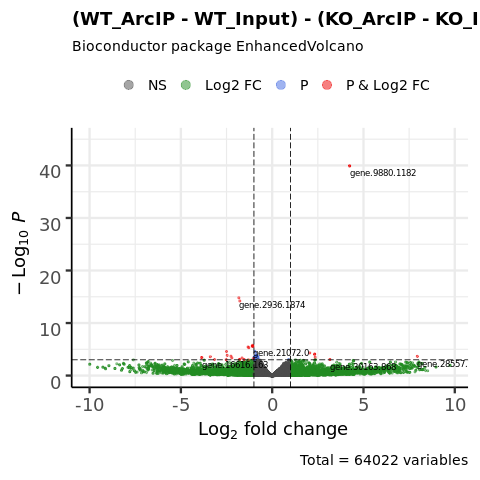

In [394]:
%%R

# Volcano plot 
vol <- EnhancedVolcano(res,
    lab = rownames(res),
    x = 'log2FoldChange',
    y = 'pvalue',
#     xlim = c(-6, 6),
    title = '(WT_ArcIP - WT_Input) - (KO_ArcIP - KO_Input)',
    pCutoff = 1e-3,
    FCcutoff = 1)
print (vol)

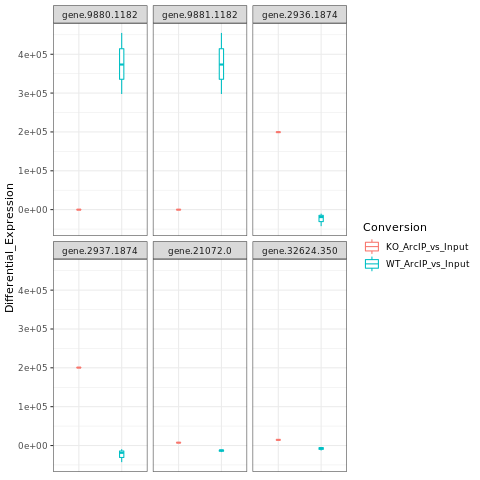

In [395]:
%%R
# check top genes 
top_genes <- rownames(head(res[order(res$pvalue),]))
myplots <- list() 
check <- data.frame()
for (g in 1:length(top_genes)){
    check <- rbind(check,data.frame(
                        'Differential_Expression' = c(
                            ncu[top_genes[g],rownames(subset (colData,cond == 'WT_Arc_IP'))] -
                            ncu[top_genes[g],rownames(subset (colData,cond == 'WT_Input'))],
                            ncu[top_genes[g],rownames(subset (colData,cond == 'KO_Arc_IP'))] -
                            ncu[top_genes[g],rownames(subset (colData,cond == 'KO_Input'))]),
                        'Conversion' = c(rep('WT_ArcIP_vs_Input',3),rep('KO_ArcIP_vs_Input',1)),
                        'Gene' = top_genes[g]))
    rownames(check) <- c()

}
ggplot(data = check, mapping = aes(x = Conversion, y = Differential_Expression, color = Conversion)) +
    geom_boxplot(width=0.1)+
    scale_fill_grey() +
    theme_bw() +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
    facet_wrap(facets = vars(Gene))

In [396]:
%%R
res <- data.frame(res, row.names = rownames(res))
positive_res <- res %>% 
                rownames_to_column('gene') %>%
                filter(log2FoldChange > 0 & pvalue < 1e-3)
positive_ncu <- ncu[positive_res$gene,]

write.table(positive_res, file="denovo_positive_WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t", quote=FALSE, col.names=NA )
write.table(positive_ncu, file="denovo_positive_gene_count_table_DE2norm.txt", sep="\t", quote=FALSE, col.names=NA) 

# Loci Viewer

In [2]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [111]:
%%R
library(Gviz, quietly = TRUE)
library(GenomicRanges, quietly = TRUE)
library(Rsamtools, quietly = TRUE)
library(tidyverse, quietly = TRUE)
library(TxDb.Mmusculus.UCSC.mm10.knownGene, quietly = TRUE)

In [101]:
%%R
txdb <- TxDb.Mmusculus.UCSC.mm10.knownGene
files <- list.files(pattern="denovo.gene.fc$")
positive <- read.table(file="denovo_positive_gene_count_table_DE2norm.txt", sep="\t")$V1[-1]
datagene <- lapply(files, function(x){read.table(file=x,header=TRUE,colClasses=c(NA, NA, NA, NA, NA, NA, NA),check.names=F)})
datagene <- lapply(datagene, function(x){ x %>% filter ( Geneid %in% positive)})

# Chromosome 11 

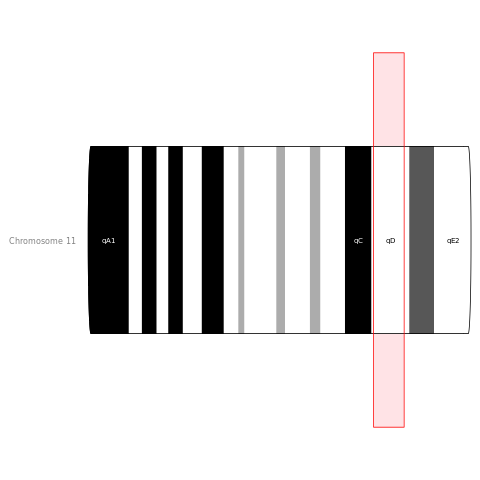

In [156]:
%%R
chr <- 'chr11'
gen <- 'mm10'

ideoTrack <- IdeogramTrack(genome = gen, chromosome = chr)
plotTracks(ideoTrack, from = 91000000, to = 100760000, showBandId = TRUE)

In [150]:
%%R
denovo_bams <- paste('16207X', 1:8, '.denovo.bam', sep = "")
#index the bam files
lapply(denovo_bams, indexBam)
KO__Input <- DataTrack(range = denovo_bams[1],
                      genome = gen,
                      name = "KO__Input",
                      chromosome = chr)
KO__Arc_IP <- DataTrack(range = denovo_bams[2],
                      genome = gen,
                      name = "KO__Arc_IP",
                      chromosome = chr)
WT_1_Input <- DataTrack(range = denovo_bams[3],
                      genome = gen,
                      name = 'WT_1_Input',
                      chromosome = chr)
WT_1_Arc_IP <- DataTrack(range = denovo_bams[4],
                      genome = gen,
                      name = 'WT_1_Arc_IP',
                      chromosome = chr)
WT_2_Input <- DataTrack(range = denovo_bams[5],
                      genome = gen,
                      name = 'WT_2_Input',
                      chromosome = chr)
WT_2_Arc_IP <- DataTrack(range = denovo_bams[6],
                      genome = gen,
                      name = 'WT_2_Arc_IP',
                      chromosome = chr)
WT_3_Input <- DataTrack(range = denovo_bams[7],
                      genome = gen,
                      name = 'WT_3_Input',
                      chromosome = chr)
WT_3_Arc_IP <- DataTrack(range = denovo_bams[8],
                      genome = gen,
                      name = 'WT_3_Arc_IP',
                      chromosome = chr)

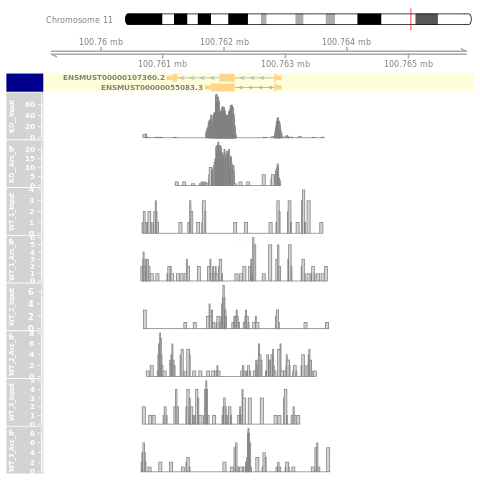

In [154]:
%%R
chr <- 'chr11'
gen <- 'mm10'
grtrack <- GeneRegionTrack(txdb, genome = gen, 
                           chromosome = chr, name = "Gene Model",
                           transcriptAnnotation = "symbol",
                           background.panel = "#FFFEDB",
                           background.title = "darkblue"
                           )
gtrack <- GenomeAxisTrack()
itrack <- IdeogramTrack(genome = gen, chromosome = chr)
# final plot calling
plotTracks(list(itrack, gtrack, grtrack,
            KO__Input, KO__Arc_IP, 
            WT_1_Input, WT_1_Arc_IP, WT_2_Input, WT_2_Arc_IP, WT_3_Input, WT_3_Arc_IP
            ), from = 100760646, to = 100763718, type = "histogram", 
            extend.left = 0.5, extend.right = 0.5, col = NULL)

# Chromosome 12

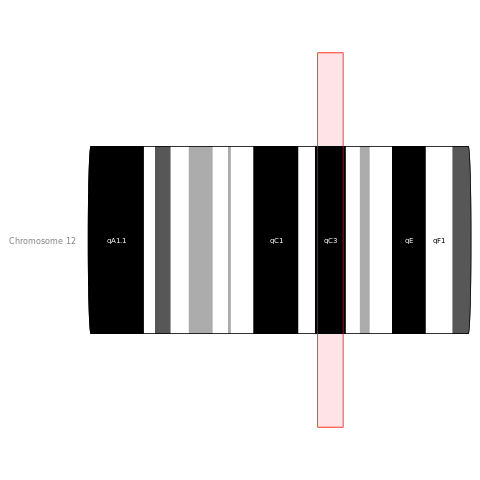

In [169]:
%%R
chr <- 'chr12'
gen <- 'mm10'

ideoTrack <- IdeogramTrack(genome = gen, chromosome = chr)
plotTracks(ideoTrack, from = 72000000, to = 80000000, showBandId = TRUE)

In [170]:
%%R
KO__Input <- DataTrack(range = denovo_bams[1],
                      genome = gen,
                      name = "KO__Input",
                      chromosome = chr)
KO__Arc_IP <- DataTrack(range = denovo_bams[2],
                      genome = gen,
                      name = "KO__Arc_IP",
                      chromosome = chr)
WT_1_Input <- DataTrack(range = denovo_bams[3],
                      genome = gen,
                      name = 'WT_1_Input',
                      chromosome = chr)
WT_1_Arc_IP <- DataTrack(range = denovo_bams[4],
                      genome = gen,
                      name = 'WT_1_Arc_IP',
                      chromosome = chr)
WT_2_Input <- DataTrack(range = denovo_bams[5],
                      genome = gen,
                      name = 'WT_2_Input',
                      chromosome = chr)
WT_2_Arc_IP <- DataTrack(range = denovo_bams[6],
                      genome = gen,
                      name = 'WT_2_Arc_IP',
                      chromosome = chr)
WT_3_Input <- DataTrack(range = denovo_bams[7],
                      genome = gen,
                      name = 'WT_3_Input',
                      chromosome = chr)
WT_3_Arc_IP <- DataTrack(range = denovo_bams[8],
                      genome = gen,
                      name = 'WT_3_Arc_IP',
                      chromosome = chr)

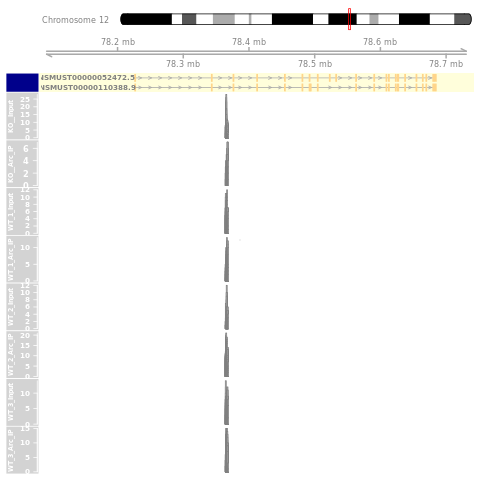

In [197]:
%%R
grtrack <- GeneRegionTrack(txdb, genome = gen, 
                           chromosome = chr, name = "Gene Model",
                           transcriptAnnotation = "symbol",
                           background.panel = "#FFFEDB",
                           background.title = "darkblue"
                           )
gtrack <- GenomeAxisTrack()
itrack <- IdeogramTrack(genome = gen, chromosome = chr)
# final plot calling
plotTracks(list(itrack, gtrack, grtrack,
            KO__Input, KO__Arc_IP, 
            WT_1_Input, WT_1_Arc_IP, WT_2_Input, WT_2_Arc_IP, WT_3_Input, WT_3_Arc_IP
            ), from = 78364500, to = 78368210, type = "histogram",
            extend.left = 280000, extend.right = 370000, col = NULL)
plotTracks(list(
            KO__Input, KO__Arc_IP, 
            WT_1_Input, WT_1_Arc_IP, WT_2_Input, WT_2_Arc_IP, WT_3_Input, WT_3_Arc_IP
            ), from = 78364500, to = 78368210, type = "histogram")

# Chromosome 14

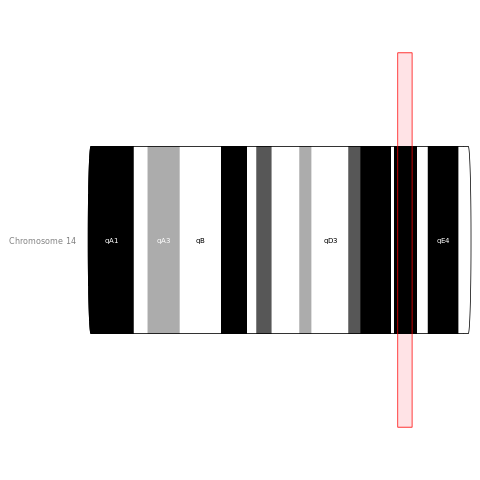

In [203]:
%%R
chr <- 'chr14'
gen <- 'mm10'

ideoTrack <- IdeogramTrack(genome = gen, chromosome = chr)
plotTracks(ideoTrack, from = 101000000, to = 105682248, showBandId = TRUE)

In [204]:
%%R
KO__Input <- DataTrack(range = denovo_bams[1],
                      genome = gen,
                      name = "KO__Input",
                      chromosome = chr)
KO__Arc_IP <- DataTrack(range = denovo_bams[2],
                      genome = gen,
                      name = "KO__Arc_IP",
                      chromosome = chr)
WT_1_Input <- DataTrack(range = denovo_bams[3],
                      genome = gen,
                      name = 'WT_1_Input',
                      chromosome = chr)
WT_1_Arc_IP <- DataTrack(range = denovo_bams[4],
                      genome = gen,
                      name = 'WT_1_Arc_IP',
                      chromosome = chr)
WT_2_Input <- DataTrack(range = denovo_bams[5],
                      genome = gen,
                      name = 'WT_2_Input',
                      chromosome = chr)
WT_2_Arc_IP <- DataTrack(range = denovo_bams[6],
                      genome = gen,
                      name = 'WT_2_Arc_IP',
                      chromosome = chr)
WT_3_Input <- DataTrack(range = denovo_bams[7],
                      genome = gen,
                      name = 'WT_3_Input',
                      chromosome = chr)
WT_3_Arc_IP <- DataTrack(range = denovo_bams[8],
                      genome = gen,
                      name = 'WT_3_Arc_IP',
                      chromosome = chr)

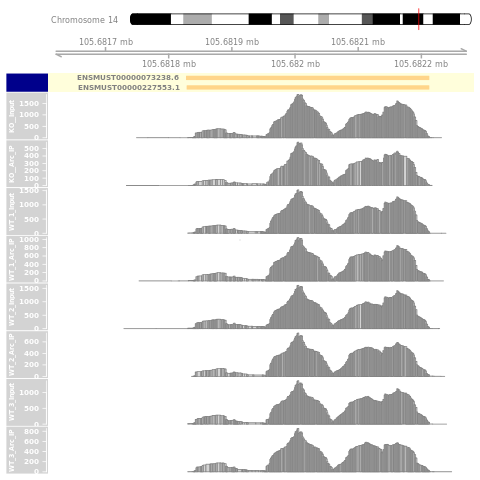

In [211]:
%%R
grtrack <- GeneRegionTrack(txdb, genome = gen, 
                           chromosome = chr, name = "Gene Model",
                           transcriptAnnotation = "symbol",
                           background.panel = "#FFFEDB",
                           background.title = "darkblue"
                           )
gtrack <- GenomeAxisTrack()
itrack <- IdeogramTrack(genome = gen, chromosome = chr)
# final plot calling
plotTracks(list(itrack, gtrack, grtrack,
            KO__Input, KO__Arc_IP, 
            WT_1_Input, WT_1_Arc_IP, WT_2_Input, WT_2_Arc_IP, WT_3_Input, WT_3_Arc_IP
            ), from = 105681729, to = 105682248, type = "histogram",
           extend.left = 0.22, extend.right = 0.05, col = NULL)

# Chromosome 15

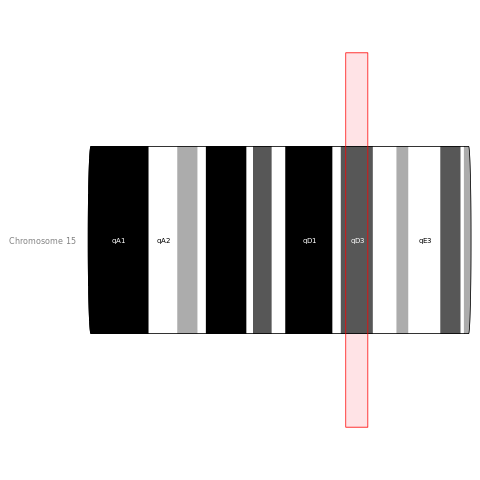

In [232]:
%%R
chr <- 'chr15'
gen <- 'mm10'

ideoTrack <- IdeogramTrack(genome = gen, chromosome = chr)
plotTracks(ideoTrack, from = 70000000, to = 76000000, showBandId = TRUE)

In [218]:
%%R
KO__Input <- DataTrack(range = denovo_bams[1],
                      genome = gen,
                      name = "KO__Input",
                      chromosome = chr)
KO__Arc_IP <- DataTrack(range = denovo_bams[2],
                      genome = gen,
                      name = "KO__Arc_IP",
                      chromosome = chr)
WT_1_Input <- DataTrack(range = denovo_bams[3],
                      genome = gen,
                      name = 'WT_1_Input',
                      chromosome = chr)
WT_1_Arc_IP <- DataTrack(range = denovo_bams[4],
                      genome = gen,
                      name = 'WT_1_Arc_IP',
                      chromosome = chr)
WT_2_Input <- DataTrack(range = denovo_bams[5],
                      genome = gen,
                      name = 'WT_2_Input',
                      chromosome = chr)
WT_2_Arc_IP <- DataTrack(range = denovo_bams[6],
                      genome = gen,
                      name = 'WT_2_Arc_IP',
                      chromosome = chr)
WT_3_Input <- DataTrack(range = denovo_bams[7],
                      genome = gen,
                      name = 'WT_3_Input',
                      chromosome = chr)
WT_3_Arc_IP <- DataTrack(range = denovo_bams[8],
                      genome = gen,
                      name = 'WT_3_Arc_IP',
                      chromosome = chr)

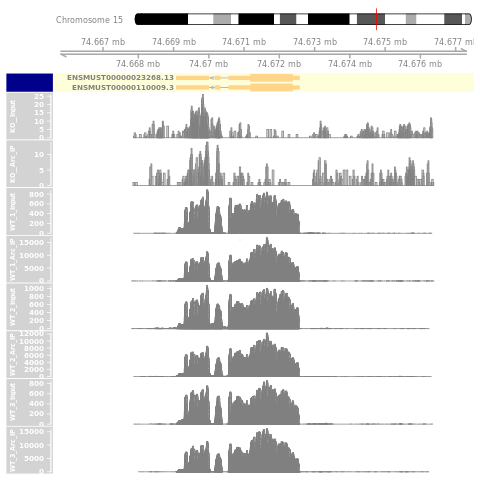

In [237]:
%%R
grtrack <- GeneRegionTrack(txdb, genome = gen, 
                           chromosome = chr, name = "Gene Model",
                           transcriptAnnotation = "symbol",
                           background.panel = "#FFFEDB",
                           background.title = "darkblue"
                           )
gtrack <- GenomeAxisTrack()
itrack <- IdeogramTrack(genome = gen, chromosome = chr)
# final plot calling
plotTracks(list(itrack, gtrack, grtrack,
            KO__Input, KO__Arc_IP, 
            WT_1_Input, WT_1_Arc_IP, WT_2_Input, WT_2_Arc_IP, WT_3_Input, WT_3_Arc_IP
            ), from = 74667807, to = 74676374, type = "histogram",
            extend.left = 0.25, extend.right = 0.1, col = NULL)

# Chromosome 3

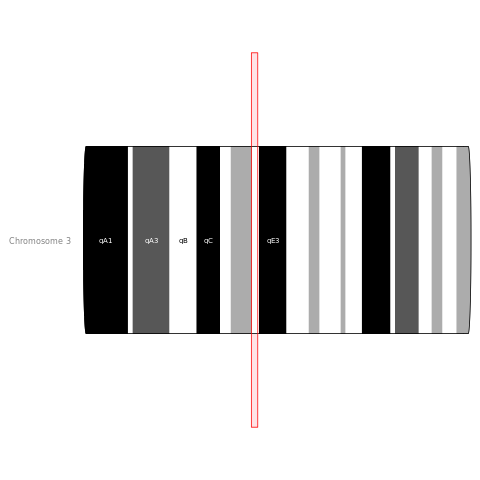

In [238]:
%%R
chr <- 'chr3'
gen <- 'mm10'

ideoTrack <- IdeogramTrack(genome = gen, chromosome = chr)
plotTracks(ideoTrack, from = 69344666, to = 72000000, showBandId = TRUE)

In [239]:
%%R
KO__Input <- DataTrack(range = denovo_bams[1],
                      genome = gen,
                      name = "KO__Input",
                      chromosome = chr)
KO__Arc_IP <- DataTrack(range = denovo_bams[2],
                      genome = gen,
                      name = "KO__Arc_IP",
                      chromosome = chr)
WT_1_Input <- DataTrack(range = denovo_bams[3],
                      genome = gen,
                      name = 'WT_1_Input',
                      chromosome = chr)
WT_1_Arc_IP <- DataTrack(range = denovo_bams[4],
                      genome = gen,
                      name = 'WT_1_Arc_IP',
                      chromosome = chr)
WT_2_Input <- DataTrack(range = denovo_bams[5],
                      genome = gen,
                      name = 'WT_2_Input',
                      chromosome = chr)
WT_2_Arc_IP <- DataTrack(range = denovo_bams[6],
                      genome = gen,
                      name = 'WT_2_Arc_IP',
                      chromosome = chr)
WT_3_Input <- DataTrack(range = denovo_bams[7],
                      genome = gen,
                      name = 'WT_3_Input',
                      chromosome = chr)
WT_3_Arc_IP <- DataTrack(range = denovo_bams[8],
                      genome = gen,
                      name = 'WT_3_Arc_IP',
                      chromosome = chr)

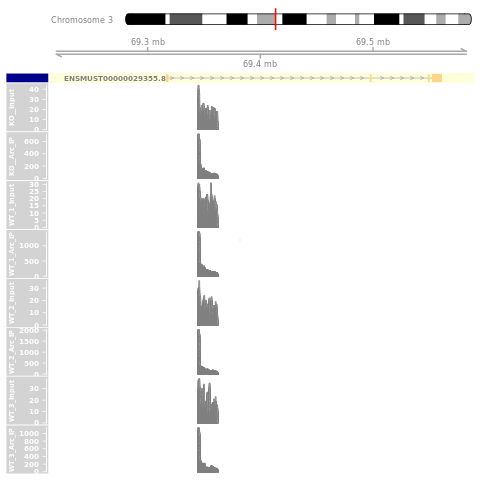

In [258]:
%%R
grtrack <- GeneRegionTrack(txdb, genome = gen, 
                           chromosome = chr, name = "Gene Model",
                           transcriptAnnotation = "symbol",
                           background.panel = "#FFFEDB",
                           background.title = "darkblue"
                           )
gtrack <- GenomeAxisTrack()
itrack <- IdeogramTrack(genome = gen, chromosome = chr)
# final plot calling
plotTracks(list(itrack, gtrack, grtrack,
            KO__Input, KO__Arc_IP, 
            WT_1_Input, WT_1_Arc_IP, WT_2_Input, WT_2_Arc_IP, WT_3_Input, WT_3_Arc_IP
            ), from = 69344666, to = 69362120, type = "histogram",
            extend.left = 130000, extend.right = 225000, col = NULL)

# Chromosome 7

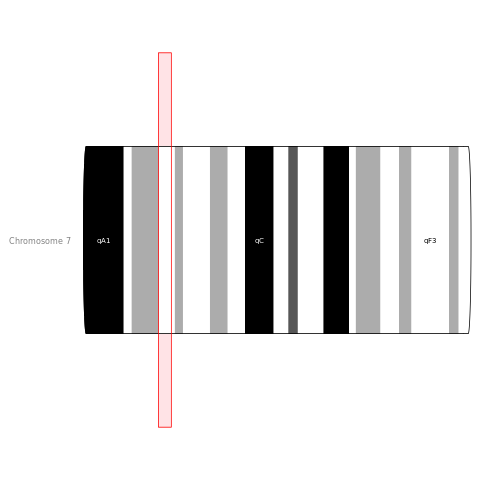

In [264]:
%%R
chr <- 'chr7'
gen <- 'mm10'

ideoTrack <- IdeogramTrack(genome = gen, chromosome = chr)
plotTracks(ideoTrack, from = 28150214, to = 33000000, showBandId = TRUE)

In [265]:
%%R
KO__Input <- DataTrack(range = denovo_bams[1],
                      genome = gen,
                      name = "KO__Input",
                      chromosome = chr)
KO__Arc_IP <- DataTrack(range = denovo_bams[2],
                      genome = gen,
                      name = "KO__Arc_IP",
                      chromosome = chr)
WT_1_Input <- DataTrack(range = denovo_bams[3],
                      genome = gen,
                      name = 'WT_1_Input',
                      chromosome = chr)
WT_1_Arc_IP <- DataTrack(range = denovo_bams[4],
                      genome = gen,
                      name = 'WT_1_Arc_IP',
                      chromosome = chr)
WT_2_Input <- DataTrack(range = denovo_bams[5],
                      genome = gen,
                      name = 'WT_2_Input',
                      chromosome = chr)
WT_2_Arc_IP <- DataTrack(range = denovo_bams[6],
                      genome = gen,
                      name = 'WT_2_Arc_IP',
                      chromosome = chr)
WT_3_Input <- DataTrack(range = denovo_bams[7],
                      genome = gen,
                      name = 'WT_3_Input',
                      chromosome = chr)
WT_3_Arc_IP <- DataTrack(range = denovo_bams[8],
                      genome = gen,
                      name = 'WT_3_Arc_IP',
                      chromosome = chr)

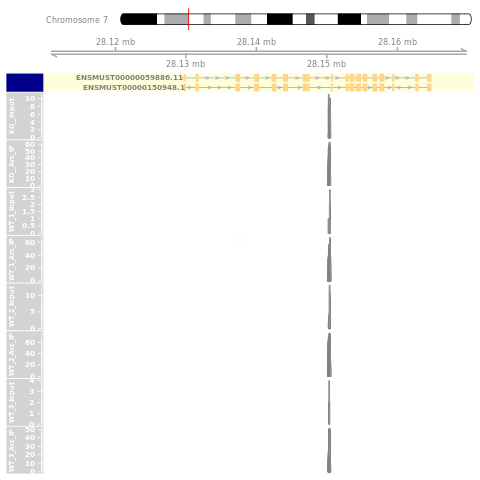

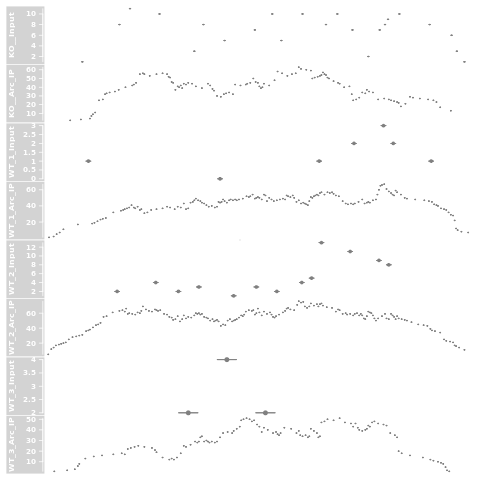

In [278]:
%%R
grtrack <- GeneRegionTrack(txdb, genome = gen, 
                           chromosome = chr, name = "Gene Model",
                           transcriptAnnotation = "symbol",
                           background.panel = "#FFFEDB",
                           background.title = "darkblue"
                           )
gtrack <- GenomeAxisTrack()
itrack <- IdeogramTrack(genome = gen, chromosome = chr)
# final plot calling
plotTracks(list(itrack, gtrack, grtrack,
            KO__Input, KO__Arc_IP, 
            WT_1_Input, WT_1_Arc_IP, WT_2_Input, WT_2_Arc_IP, WT_3_Input, WT_3_Arc_IP
            ), from = 28150214, to = 28150494, type = "histogram",
            extend.left = 40000, extend.right = 20000, col = NULL)
plotTracks(list(
            KO__Input, KO__Arc_IP, 
            WT_1_Input, WT_1_Arc_IP, WT_2_Input, WT_2_Arc_IP, WT_3_Input, WT_3_Arc_IP
            ), from = 28150214, to = 28150494, type = "boxplot")

# Chromosome 8

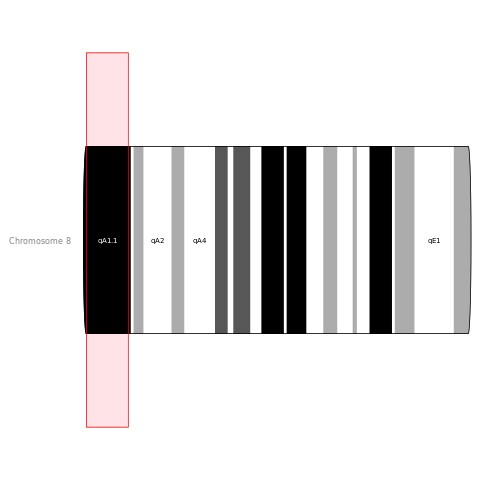

In [285]:
%%R
chr <- 'chr8'
gen <- 'mm10'

ideoTrack <- IdeogramTrack(genome = gen, chromosome = chr)
plotTracks(ideoTrack, from = 1000000, to = 15000000, showBandId = TRUE)

In [286]:
%%R
KO__Input <- DataTrack(range = denovo_bams[1],
                      genome = gen,
                      name = "KO__Input",
                      chromosome = chr)
KO__Arc_IP <- DataTrack(range = denovo_bams[2],
                      genome = gen,
                      name = "KO__Arc_IP",
                      chromosome = chr)
WT_1_Input <- DataTrack(range = denovo_bams[3],
                      genome = gen,
                      name = 'WT_1_Input',
                      chromosome = chr)
WT_1_Arc_IP <- DataTrack(range = denovo_bams[4],
                      genome = gen,
                      name = 'WT_1_Arc_IP',
                      chromosome = chr)
WT_2_Input <- DataTrack(range = denovo_bams[5],
                      genome = gen,
                      name = 'WT_2_Input',
                      chromosome = chr)
WT_2_Arc_IP <- DataTrack(range = denovo_bams[6],
                      genome = gen,
                      name = 'WT_2_Arc_IP',
                      chromosome = chr)
WT_3_Input <- DataTrack(range = denovo_bams[7],
                      genome = gen,
                      name = 'WT_3_Input',
                      chromosome = chr)
WT_3_Arc_IP <- DataTrack(range = denovo_bams[8],
                      genome = gen,
                      name = 'WT_3_Arc_IP',
                      chromosome = chr)

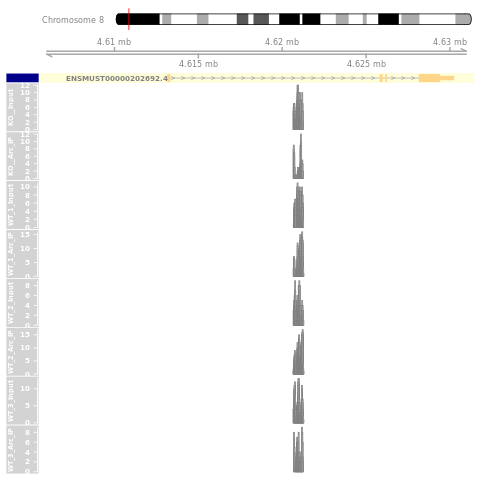

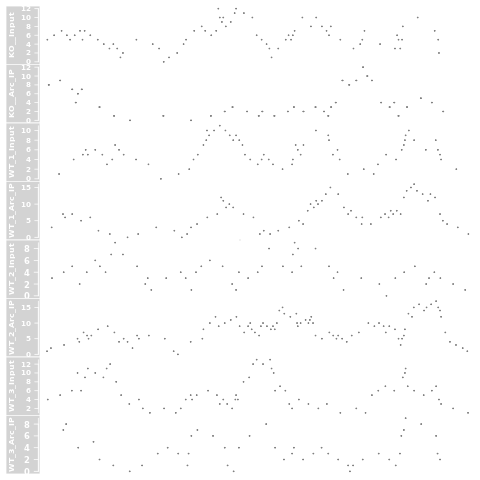

In [297]:
%%R
grtrack <- GeneRegionTrack(txdb, genome = gen, 
                           chromosome = chr, name = "Gene Model",
                           transcriptAnnotation = "symbol",
                           background.panel = "#FFFEDB",
                           background.title = "darkblue"
                           )
gtrack <- GenomeAxisTrack()
itrack <- IdeogramTrack(genome = gen, chromosome = chr)
# final plot calling
plotTracks(list(itrack, gtrack, grtrack,
            KO__Input, KO__Arc_IP, 
            WT_1_Input, WT_1_Arc_IP, WT_2_Input, WT_2_Arc_IP, WT_3_Input, WT_3_Arc_IP
            ), from = 4620668, to = 4621272, type = "histogram",
            extend.left = 15000, extend.right = 10000, col = NULL)
plotTracks(list(
            KO__Input, KO__Arc_IP, 
            WT_1_Input, WT_1_Arc_IP, WT_2_Input, WT_2_Arc_IP, WT_3_Input, WT_3_Arc_IP
            ), from = 4620668, to = 4621272, type = "boxplot")